In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np
from numpy import nan as nan
import matplotlib
matplotlib.use('nbAgg')

import matplotlib.pyplot as plt

import re
plt.close()

In [3]:
%cd "C:/Users/Student/Downloads/SecondProject/"

C:\Users\Student\Downloads\SecondProject


In [4]:
#%ls
#Bring in District to Tract Data

#Trct2dist_l.txt file is comma delimited, with the following fields:
#State,Tract,County/IndependentCity,StateLegislativeDistrictsLower
#this particular file has data for the lower chamber in Virginia 

#This file is downloaded from census.gov, specifically https://www.census.gov/geo/maps-data/data/sld_state.htm

#!!!!!!FILE IS SPECIFIC TO VIRGINIA!!!!!!

# data is labled from 2018 state legislative districts, but much of data based on 2010 census, which is the latest census

#census tract:Census tracts are small, relatively stable statistical subdivisions of a county or statistically equivalent entity
#The primary purpose of census tracts is to provide a stable set of geographic units, unique within county, 
#for the presentation of decennial census data.

#The dataframe D2T created by reading the trct2dist_l.txt file allows manipulation/correlating of Census Tract data 
#with individual State Districts

colnames=['ST' , 'TRACT' , 'CTY/CNTY' , 'DIST_NBR']
dist2tract= pd.read_csv('trct2dist_l.txt', names=colnames, dtype={'ST': str, 'TRACT': str, \
                'CTY/CNTY': str, 'DIST_NBR': str}, skiprows=2)

#Sort by District Number, then Tract
dist2tract= dist2tract.sort_values(by=['DIST_NBR', 'TRACT'])

#Not using
#dist2tract.reset_index()
#dist2tract.sort_index()
print(dist2tract)

#Below demonstrates that tracts span district, e.g. 980100 appears to span 17 districts
#it does span many, not quite 17 since CTY/CNTY parameter is included in the rows so if 
#CTY/CNTY is different a tract may repeat in a district
#This is checked against source file

dist2tract_span = np.array
dist2tract_span = dist2tract.iloc[:,1]

#value_counts gives number or count of value in a Series, in this case the second column
#or entry for TRACT from the sorted dist2tract object (Series). Returns counts of unique values, 
#basically determining how many entries there are for each tract. 
#For values > 1 this will indicate that soem tracts are located in more than one legislative district 
#and/or county/city

dist2tract_span_cats = dist2tract_span.value_counts(sort=True, ascending=False)

#setting normalize to true normalizes data, i.e. 
#dist2tract_span_cats = dist2tract_span.value_counts(normalize=True, sort=True, ascending=False)

#This print out nicely organizes the data numerically to show how many tracts per district.
#print(dist2tract_span_cats)


############################################################################################################################
######CODE BELOW NOT BEING USED
############################################################################################################################
#ones is an index object
#ones = dist2tract_span_freq.index.where(dist2tract_span_freq.values==1)
#ones= ones[~ones.isin([np.nan]).any(0)]
#print(ones.dtype)

##https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html
#print(ones.notna())
#mask= D2T_span_freq.isin(ones)
#for i in range(0,len(mask)-1):
    #print(mask[i])
#print(mask[1001])
#print(D2T_span_freq[mask])
#for i in range(0,len(D2T_span_cats)-1):
#if D2T_span_cats.iloc[:] ==1:
   #print(D2T_span_cats.iloc[:])
#D2T_span_freq.index
#D2T_span_cats.plot(kind='bar', figsize=[20,20])
#D2T_span_cats.plot(kind='hist', figsize=[10,25])
#dist2tract_span_freq = dist2tract_span.value_counts()
#print('here2')
#print(dist2tract_span_cats)
#print(dist2tract_span_freq)
#plt.show()

      ST   TRACT CTY/CNTY DIST_NBR
730   51  030100      169      001
746   51  030200      169      001
769   51  030300      169      001
780   51  030400      169      001
795   51  030500      169      001
806   51  030600      169      001
2424  51  930700      195      001
2438  51  930800      195      001
2440  51  930900      195      001
2441  51  931000      195      001
2442  51  931100      195      001
2443  51  931200      195      001
2444  51  931300      195      001
2445  51  931400      195      001
2446  51  931500      195      001
2450  51  950100      105      001
2458  51  950200      105      001
2465  51  950300      105      001
2470  51  950400      105      001
2473  51  950500      105      001
2476  51  950600      105      001
2485  51  960100      720      001
257   51  010107      179      002
259   51  010108      179      002
276   51  010201      179      002
279   51  010202      179      002
281   51  010204      179      002
284   51  010205    

<IPython.core.display.Javascript object>


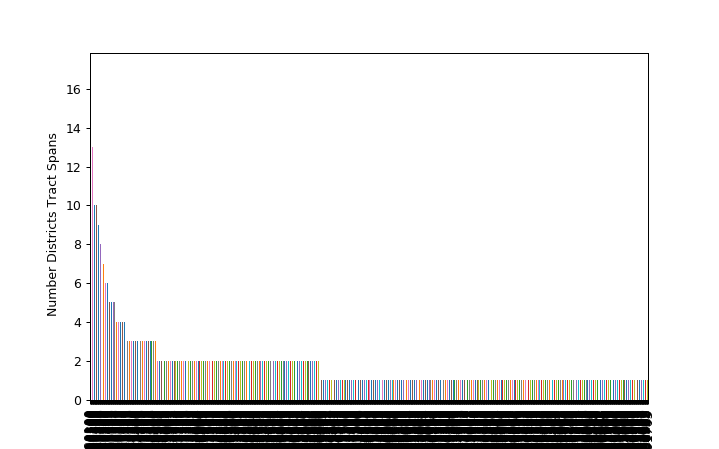

In [5]:
#Next three graphs- in this and two below blocks- show various plot type to show distribution of number of apprx. numbers where tracts span more than one distirct
#Does not line up exactly tract to district because cty/county is part of definition
#that makes a record unique. However, given the legal mandate of minimizing 
#division of counties/cities among district, and spot checking, most of these cases appear
#to be where tracts do span districts. 


dist2tract_span_cats.plot(kind='bar', figsize=[8,5])

plt.ylabel(' Number Districts Tract Spans')

plt.show()


<IPython.core.display.Javascript object>


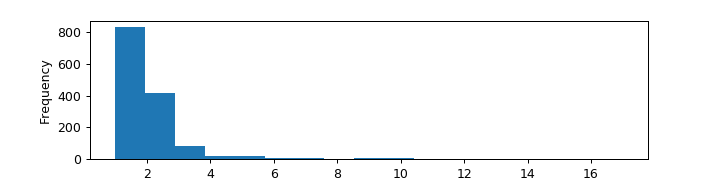

In [6]:
dist2tract_span_cats.plot(kind='hist', bins = 17, figsize=[8,2])
plt.xlabel('Apprx. Number Tracts per district')
plt.show()

<IPython.core.display.Javascript object>


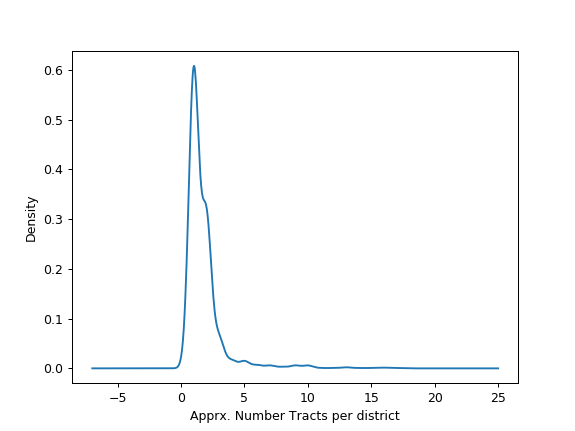

In [7]:

dist2tract_span_cats.plot.density()
plt.xlabel('Apprx. Number Tracts per district')
plt.show()

In [8]:
#Bring in Zip2Tract Data

#To map the census tract to zip code a crosswalk file available at 
#https://www.huduser.gov/portal/datasets/usps_crosswalk.html is used.  

#This file is dated 4th quarter, 2018

#This is a comma separated file has the following zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio

#specify the column names
colnames=['ZIP','TRACT','RES_RATIO','BUS_RATIO','OTH_RATIO', 'TOT_RATIO']

#dtype={'ZIP':str,\
                   # 'TRACT':str,'RES_RATIO': float, 'BUS_RATIO':float, \
                    # 'OTH_RATIO': float, 'TOT_RATIO': float},\

#, converters={'ZIP':str,'TRACT':str}

#read the csv file into dataframe 'Zip2Tract, specifying datatypes for the columns
#and using column names defined above

zip2tract= pd.read_csv('ZIP2TRACT.txt',  names=colnames, dtype={'ZIP':str,\
                   'TRACT':str,'RES_RATIO': float, 'BUS_RATIO':float, \
                    'OTH_RATIO': float, 'TOT_RATIO': float}, skiprows=1)

#Z2T.reindex()

zip2tract =zip2tract.sort_values(by=['TRACT', 'ZIP'], ascending=True)
#zip2tract.sort_index()



print(zip2tract)

          ZIP        TRACT  RES_RATIO  BUS_RATIO  OTH_RATIO  TOT_RATIO
45134   36067  01001020100   0.063185   0.030272   0.058140   0.060798
130576  36067  01001020200   0.072278   0.307770   0.209302   0.090592
76177   36067  01001020300   0.110904   0.108981   0.267442   0.112687
130574  36066  01001020400   0.192920   0.088591   0.030769   0.179404
45139   36067  01001020400   0.003575   0.092836   0.023256   0.010121
23496   36066  01001020500   0.562513   0.598658   0.717949   0.570908
147722  36067  01001020500   0.000466   0.016145   0.000000   0.001568
78275   36068  01001020500   1.000000   1.000000   1.000000   1.000000
151954  36067  01001020600   0.137872   0.090817   0.174419   0.134996
66366   36067  01001020700   0.128313   0.205853   0.075581   0.133143
1958    36067  01001020801   0.106629   0.045409   0.063953   0.101782
40598   36008  01001020802   0.892857   1.000000   0.000000   0.906250
23467   36022  01001020802   0.168506   0.075472   0.000000   0.166375
130591

In [10]:

#Below demonstrates that tracts span district, e.g. 980100 appears to span 17 districts
#it does span many, not quite 17 since CTY/CNTY parameter is included in the rows so if 
#CTY/CNTY is different a tract may repeat in a district
#This is checked against source file

zip2tract_span = np.array
zip2tract_span = zip2tract.iloc[:,0]

#################################################################
#JUst started late last night, may be unecessay
#df = zip2tract.drop_duplicates().groupby('TRACT').count()

#print(df.sort_values(by=['ZIP', 'TRACT']))

#df.plot(kind='hist', figsize=[12,5])
#plt.show()

###########################################################################

#print(zip2tract_span)

#value_counts gives number or count of value in a Series, in this case the second column
#or entry for TRACT from the sorted dist2tract object (Series). Returns counts of unique values, 
#basically determining how many entries there are for each tract. 
#For values > 1 this will indicate that soem tracts are located in more than one legislative district 
#and/or county/city

zip2tract_span_cats = zip2tract_span.value_counts(sort=True, ascending=False)



#setting normalize to true normalizes data, i.e. 
#dist2tract_span_cats = dist2tract_span.value_counts(normalize=True, sort=True, ascending=False)

#This print out nicely organizes the data numerically to show how many tracts per district.
print(zip2tract_span_cats)



00959    73
00926    68
00957    68
60647    53
00956    51
00961    48
00976    47
11236    46
60609    46
11234    46
11207    43
11204    41
00924    41
11203    40
60618    40
73160    39
11230    39
60639    39
00725    39
11229    38
11385    37
60608    37
00962    37
91331    36
11377    36
11223    36
11220    36
11214    36
11210    35
11221    35
         ..
77442     1
21150     1
30917     1
85627     1
19898     1
96771     1
13043     1
61323     1
42156     1
47991     1
52329     1
68923     1
53784     1
72766     1
85738     1
70139     1
52771     1
73844     1
45642     1
70009     1
35449     1
83206     1
97466     1
48862     1
99921     1
57766     1
70464     1
01784     1
06602     1
31648     1
Name: ZIP, Length: 39295, dtype: int64


In [11]:
#Set up a regular expressionb to check if the TRACT col. starts with 51, i.e. Virginia

regex= re.compile('^51')

#colnames=['ZIP','TRACT','RES_RATIO','BUS_RATIO','OTH_RATIO', 'TOT_RATIO']
#colnames=['ZIP','TRACT']

#create a dataframe for only the Virginia data, using the regular expression to filter 
zip2tract_va=zip2tract[zip2tract.TRACT.str.contains(regex)]
#print(zip2tract_va)

#Now create a dataframe where TRACT is sliced to the last 6 characters so it can be tested for merge on
#the previous dataset coming from zip2tract file. Adding the column names which will be used later in the merge command

zip2tract6_va = pd.DataFrame({'ZIP':zip2tract_va.iloc[:,0],'TRACT':zip2tract_va.TRACT.str[-6:]} )
zip2tract6_va.sort_values(by='TRACT', ascending=True, inplace=True)

#default merge option is inner, so result is a set  where TRACT values are equivalent in the two sources being merged
#zip2tract2dist_va= pd.merge(zip2tract6_va, dist2tract, on='TRACT')
zip2tract2dist_va= pd.merge(zip2tract6_va, dist2tract, on='TRACT', indicator=True)

#zip2tract2dist_va = zip2tract2dist_va[['ZIP','DIST_NBR']]
zip2tract2dist_va = zip2tract2dist_va[['DIST_NBR', 'ZIP']]

#print("Before duplicate drop zip/dist combo is: ")
#print(zip2tract2dist_va.shape)

#print(zip2tract2dist_va)

#Let's get rid of any dupes of zip, dist.


#print(zip2tract6_va)
#print(dist2tract)

zip2tract2dist_va.drop_duplicates(inplace=True)

zip2tract2dist_va.sort_values(by=['DIST_NBR', 'ZIP'], ascending=True, inplace=True)

print('Sanity check, after drop dupes nbr rows of unique zip/district combo is:')
#print(zip2tract2dist_va.shape)
#print(zip2tract2dist_va.shape)



Sanity check, after drop dupes nbr rows of unique zip/district combo is:


<IPython.core.display.Javascript object>


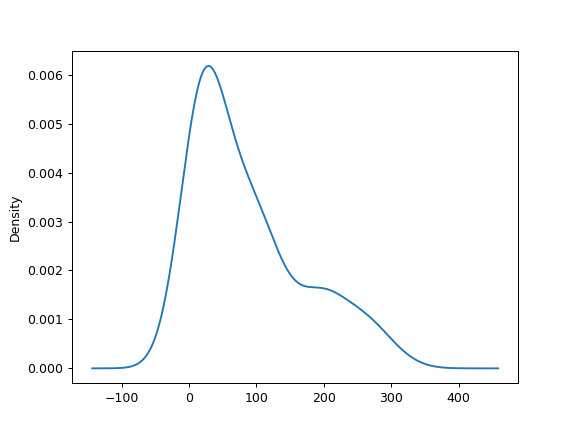

In [12]:
#Since according to Googel, there are 1214 zip codes for Virginia
#and since we are seeing about 7 times that number for zip code/district combo
#Clearly some zipcodes span more than one district.
#It's worth finding out if this is widespread, i.e. common to many districts
#or is it limited to relatively few districts where it occurs multiple times

nbr_zips2dist = zip2tract2dist_va.iloc[:,0].value_counts(sort=True, ascending=False)
nbr_dist2zip = zip2tract2dist_va.iloc[:,1].value_counts(sort=True, ascending=False) # think of nbr dist. a zip spans


nbr_zips2dist.plot.density()
plt.show()

#nbr_dist2zip.plot.density()
#nbr_dist2zip.plot.density()
#plt.show()


#nbr_zips2dist.plot(kind='hist', bins = 17, figsize=[8,2])
#plt.xlabel('Apprx. Number Tracts per district')
#plt.show()

#nbr_dist2zip.plot(kind='hist', bins = 17, figsize=[8,2])
#plt.xlabel('Apprx. Number Tracts per district')
#plt.show()



<IPython.core.display.Javascript object>


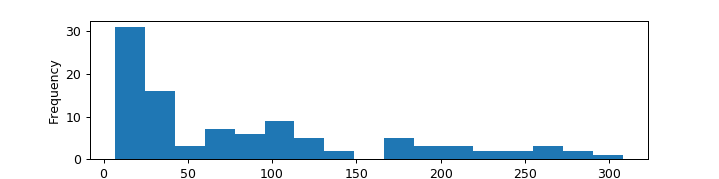

In [13]:
nbr_zips2dist.plot(kind='hist', bins = 17, figsize=[8,2])
plt.xlabel('Apprx. Number Tracts per district')
plt.show()

<IPython.core.display.Javascript object>


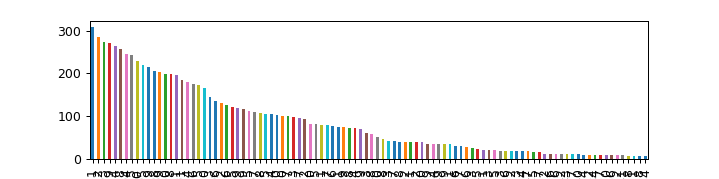

In [14]:
nbr_zips2dist.plot(kind='bar',  figsize=[8,2])
plt.xlabel('Apprx. Number Tracts per district')
plt.show()

<IPython.core.display.Javascript object>


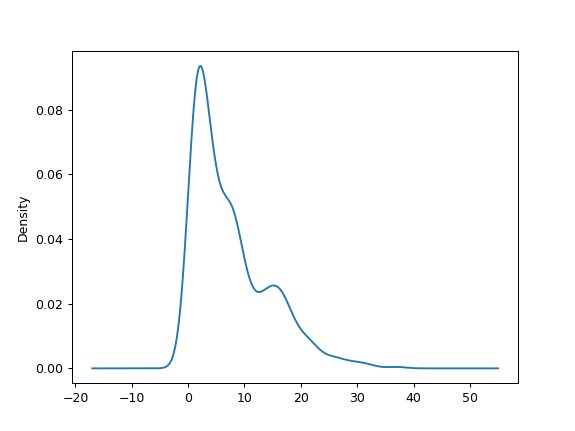

In [15]:
nbr_dist2zip.plot.density()
plt.show()


<IPython.core.display.Javascript object>


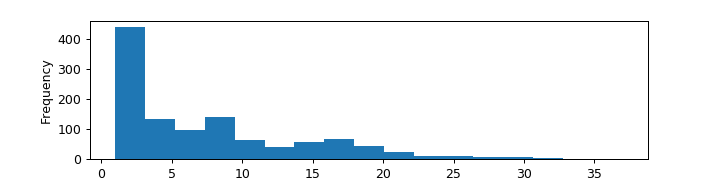

In [16]:
nbr_dist2zip.plot(kind='hist', bins = 17, figsize=[8,2])
plt.xlabel('Apprx. Number Tracts per district')
plt.show()


<IPython.core.display.Javascript object>


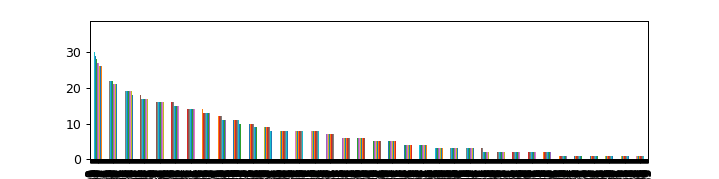

In [17]:
nbr_dist2zip.plot(kind='bar',  figsize=[8,2])
plt.xlabel('Apprx. Number Tracts per district')
plt.show()

<IPython.core.display.Javascript object>


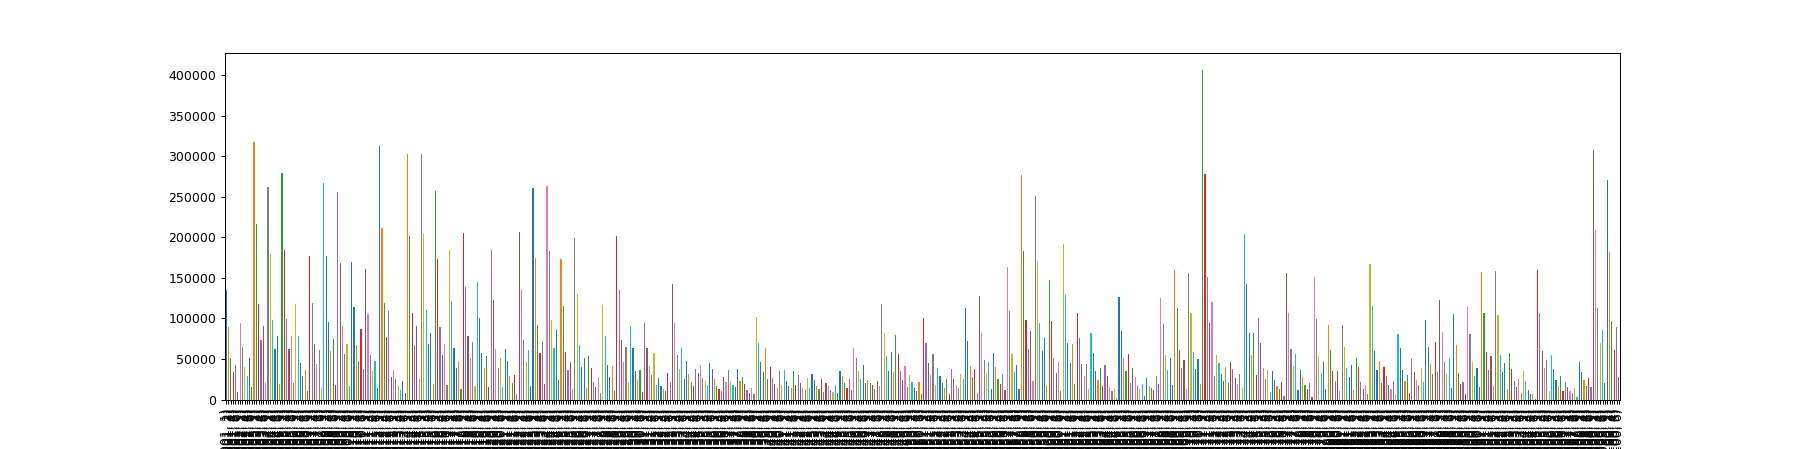

In [18]:
#names=colnames, dtype={'ST': str, 'TRACT': str, 'CTY/CNTY': str, 'DIST_NBR': str},


colnames=['FIPS' ,   'ZIP' , 'AGI_STUB', 'NBR_RTNS']
zip2agi = pd.read_csv('16zpallagi.csv',  usecols =[0,2,3,4], names=colnames, dtype={'FIPS':str, \
    'ZIP': str, 'AGI_STUB':str, 'NBR_RTNS': int}, skiprows=1)


#create a dataframe for only the Virginia data, using the regular expression to filter 
zip2agi_va=zip2agi[zip2agi.FIPS.str.contains(regex)]

#print(zip2agi_va.shape)

#Below merge zip2agi_va with zip2tract2dist_va based on ZIP in common
#zip2tract2dist_va = 8702 rows, derived above
#zip2agi_va = 4965
#4965 / 6 = 828; 
#Elsewhere (within files given) found VA has 809 zips
#divided by 6 becasue each zip is given 6 AGI_STUBS

#inner join which is default makes most sense because
#agi file has some zips =0 which will ot match with any district and,
#any zips in the district file not in agi file will not have
#nbr_rtrns nor agi_stub, so cannot be used
zip2dist_va= pd.merge(zip2tract2dist_va,zip2agi_va,  on='ZIP')
zip2dist_va.sort_values(by=['DIST_NBR','ZIP', 'AGI_STUB'],  ascending=True, inplace=True)
#zip2dist_va.sort_values(by=['DIST_NBR', 'AGI_STUB'],  ascending=True, inplace=True)



zip2dist_va.drop_duplicates(['ZIP','AGI_STUB','NBR_RTNS','DIST_NBR'],  inplace=True) 
#zip2dist_va.drop_duplicates(['ZIP','AGI_STUB','NBR_RTNS'],  inplace=True) 

#df4grouping = pd.DataFrame({'key1':zip2dist_va['AGI_STUB'], 'data1':zip2dist_va['NBR_RTNS']})
df4grouping = pd.DataFrame({'agi_bin':zip2dist_va['AGI_STUB'], 'distr':zip2dist_va['DIST_NBR'],'data1':zip2dist_va['NBR_RTNS'] })


#print(zip2dist_va['AGI_STUB'])
#print(zip2dist_va['NBR_RTNS'])

#grouped=df4grouping['rtns_data'].groupby(df4grouping['agi_key'])

#group data1, i.e. nbr_rtns, by disrict and agi_stubs within districts
#to end up with aggregation of number of retrun by agi_stub, by district

grouped=df4grouping['data1'].groupby([df4grouping['distr'],df4grouping['agi_bin']])

agi2district= grouped.sum()

#agi2district =pd.DataFrame(grouped.sum(), columns=['1','2','3','4','5','6'])

agi2district.to_frame(name='[1,2,3,4,5,6]')

#print(agi2district.describe)

#print(agi2district)


agi2district.plot(kind='bar', xticks=[1,600], figsize=[20,5])

#agi2district.plot()
plt.show()

#grouped = zip2dist_va.groupby(zip2dist_va['AGI_STUB'])

#print(grouped.AGI_STUB)





#nbr_dist2zip.plot(kind='hist', bins = 17, figsize=[8,2])
#plt.xlabel('Apprx. Number Tracts per district')
#plt.show()





In [19]:
#Not using, saving for possible future use
# Iterator Class For District
# Disrict Class

class IterDistrict(type):
    def __iter__(cls):
        return iter(cls._instances)


class District(metaclass=IterDistrict):
#class District:
    _instances = []

    def __init__(self, dist_nbr, tract_copy=[]):
        self._instances.append(self)
        
        self.dist_nbr = dist_nbr
        self.tract=tract_copy
        
    def peek(variables):
        print(variables)
        

In [20]:
#Not using, saving for possible future use
tract = []
tractholder = []
#districtlist = (District(dist_nbr,tract) for j in range(100))
distholder= []

first=True
for i in range(0,len(dist2tract)): 
    if first:
        tract.clear()
        #print('In first')
        new_nbr= int(dist2tract.iloc[i,3])
        #print(new_nbr)
        #print('i here is: ', i)
        #District(str(new_nbr))
        tract.append(dist2tract.iloc[i,1])
        #print(tract[0])
        
        first = False
        
    else:
        #print('Outta First')
        #print('i here is: ', i)
        new_nbr= int(dist2tract.iloc[i,3])
        prev_nbr= int(dist2tract.iloc[i-1,3])
        #print(new_nbr)
        #print(prev_nbr)
        #add just the tract to Dist
        if new_nbr == prev_nbr:
            tract.append(dist2tract.iloc[i,1])
            #print(tract[0])
            if new_nbr ==100 and  i == len(dist2tract)-1:
                dist_nbr = new_nbr
               # print(dist_nbr)
                #for a_district in districtlist:
                #tract.append(B.iloc[i,1])
                tract_copy = tract.copy()
                distholder.append(District(dist_nbr, tract_copy))
                #print(tract[0])
        elif ((new_nbr != prev_nbr)):
            #print('i here is: ', i)
            #print(tract[0])
            dist_nbr =prev_nbr
            #for a_district in districtlist:
            tract_copy = tract.copy()
            distholder.append(District(dist_nbr, tract_copy))
            #districtlist.append(District(dist_nbr, tract))
           
            #print(tract[0])
            first=True
            
       